In [1]:
%%capture

import importlib
from shapely.geometry import Polygon
from shapely.geometry.polygon import orient
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import device_geo as geo
importlib.reload(geo)

import bar
importlib.reload(bar)

# Generic example

Here is an example of how to interact with device_geo Feature and Device

In [2]:
bar_points = [(0,0),(1,0),(1,1),(0,1)]
feat_1 = geo.Feature(bar_points)
feat_2 = feat_1.copy()
feat_2.scale(2, 2)

dev = geo.Device()
dev.register_feature(feat_1, 0, 0, 0, 0)
dev.register_feature(feat_1, 2, 2, 0, 0)
dev.register_feature(feat_1, 2.5, 2.5, 0, 0)
dev.register_feature(feat_2, 0, 0, 45, 1)

dev.heal()

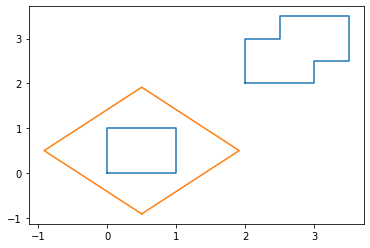

In [3]:
fig = dev.gen_fig()

In [4]:
dev.write_dxf()

## Combining polygons into a single feature

In [5]:
bar_points = [(0,0),(1,0),(1,1),(0,1)]
new_points = [(0.5, 1.5), (1.5, 0.5), (0.5, 0.5)]
feat = geo.Feature(bar_points)
feat.union(new_points)

In [6]:
feat.poly.exterior.coords.xy

(array('d', [0.0, 0.0, 0.5, 0.5, 1.0, 1.5, 1.0, 1.0, 0.0]),
 array('d', [0.0, 1.0, 1.0, 1.5, 1.0, 0.5, 0.5, 0.0, 0.0]))

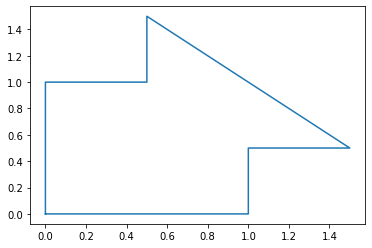

In [7]:
fig = feat.gen_fig()

As written now, a single feature cannot be a set of disjoint polygons

In [12]:
bar_points = [(0,0),(1,0),(1,1),(0,1)]
new_points = [(0.5, 1.5), (1.5, 0.5), (0.5, 0.5)]
new_points = [(x+10,y) for (x,y) in new_points]
feat = geo.Feature(bar_points)
feat.union(new_points)

ValueError: Polygons are disjoint

# Bar class demo

Here is a second example using a prebuilt Device class

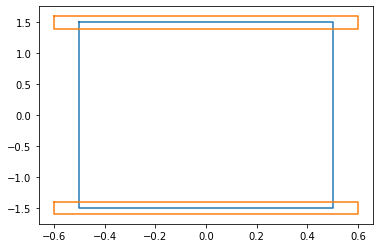

In [8]:
bar = bar.Bar(3,1)
fig = bar.gen_fig()